Sentiment Analysis on the Twitter tweets

In [ ]:
#Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving TwitterLogin.csv to TwitterLogin.csv


In [ ]:
#Twitter login details
login = pd.read_csv("TwitterLogin.csv")

In [ ]:
# Twitter Api Credentials
consumerKey = login["Key"][0]
consumerSecret = login["Key"][1]
accessToken = login["Key"][2]
accessTokenSecret = login["Key"][3]

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
search_words = "#nifty"
date_since = "2020-01-01"

In [ ]:
# Collect tweets
niftyTwts = tweepy.Cursor(api.search,
              q=search_words,
              lang="en").items(1000)
# Iterate and print tweets
j=1
for tweet in niftyTwts:
  print(str(j) +') '+ tweet.text + '\n')
  j = j+1
  if j==5:
    break

1) #banknifty relative strength has reached levels where a strong rally cannot be ruled out. I am expecting 25k soon,… https://t.co/TOZD2WZRj2

2) I made a little friend for Nifty.🥰 He still needs work. #draft #art #fanart #HazbinHotel #Nifty #Angeldust… https://t.co/uNm7P2VsXw

3) RT @NSEIndia: Proud to announce that AUM of all ETFs tracking Nifty50 index in India has crossed a milestone of Rs. 1 Trillion! 
The total…

4) 🗓️ 16th Sep, 2020.
📈 Market Closing Snapshot with Valuation Meter.

Join My WhatsApp Broadcast on Mutual Funds, Cli… https://t.co/RNxBRYq2ja



In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.text for tweet in niftyTwts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,90 to 124 \nNifty bees=35% plus \nDoes stock y...
1,Had wonderful day today #nifty #banknifty #Mon...
2,Bank Nifty and Nifty Analysis for 17 Sept 2020...
3,RT @rachitpjain: #Nifty observation https://t....
4,RT @rachitpjain: #Nifty observation https://t....


In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 return text

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,90 to 124 \nNifty bees=35% plus \nDoes stock y...
1,Had wonderful day today nifty banknifty MoneyC...
2,Bank Nifty and Nifty Analysis for 17 Sept 2020...
3,: Nifty observation
4,: Nifty observation
...,...
991,: Unichem lab\nNifty \nTheEquityCurve \n\nUnic...
992,: ✳️ POSITIONAL STOCK✳️\n ✅ RELAXO ✅\n\nBUY...
993,: ✳️ POSITIONAL STOCK✳️\n ✅ SHILPA MED ✅\n\...
994,: NIFTY TRADE INTRADAY\nDATE - 16TH SEP 2020\n...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,90 to 124 \nNifty bees=35% plus \nDoes stock y...,0.000,0.0
1,Had wonderful day today nifty banknifty MoneyC...,1.000,1.0
2,Bank Nifty and Nifty Analysis for 17 Sept 2020...,0.000,0.0
3,: Nifty observation,0.000,0.0
4,: Nifty observation,0.000,0.0
...,...,...,...
991,: Unichem lab\nNifty \nTheEquityCurve \n\nUnic...,0.300,0.0
992,: ✳️ POSITIONAL STOCK✳️\n ✅ RELAXO ✅\n\nBUY...,0.100,0.0
993,: ✳️ POSITIONAL STOCK✳️\n ✅ SHILPA MED ✅\n\...,0.100,-0.1
994,: NIFTY TRADE INTRADAY\nDATE - 16TH SEP 2020\n...,0.125,0.0


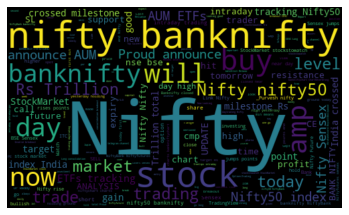

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,90 to 124 \nNifty bees=35% plus \nDoes stock y...,0.000,0.0,Neutral
1,Had wonderful day today nifty banknifty MoneyC...,1.000,1.0,Positive
2,Bank Nifty and Nifty Analysis for 17 Sept 2020...,0.000,0.0,Neutral
3,: Nifty observation,0.000,0.0,Neutral
4,: Nifty observation,0.000,0.0,Neutral
...,...,...,...,...
991,: Unichem lab\nNifty \nTheEquityCurve \n\nUnic...,0.300,0.0,Neutral
992,: ✳️ POSITIONAL STOCK✳️\n ✅ RELAXO ✅\n\nBUY...,0.100,0.0,Neutral
993,: ✳️ POSITIONAL STOCK✳️\n ✅ SHILPA MED ✅\n\...,0.100,-0.1,Negative
994,: NIFTY TRADE INTRADAY\nDATE - 16TH SEP 2020\n...,0.125,0.0,Neutral


In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Had wonderful day today nifty banknifty MoneyControl 

2) 16/9/20

Summary

Started the day with 2 good trades, 1 trailed SL too soon &amp; the other early entry

Later trades w… 

3) 4. &amp; 5. Did 2 more NIFTY Option trades on the Short side when clear signs of bullishness in the market

All emotio… 

4) : Best stock for intraday tomorrow 17 September 2020  I intraday trading w...  via  

inves…

5) __DSouza: Good session for 🐂 
But data doesn't give much direction

Flows today
FII +265cr
DII -212cr

FII In FNO (in contracts)
a…

6) : Proud to announce that AUM of all ETFs tracking Nifty50 index in India has crossed a milestone of Rs. 1 Trillion! 
The total…

7) : HazbinHotel Comic Dub


Comic by _Whiskers 

Edited by:  

Charlie and Nifty:…

8) : Nifty is facing strong resistance at 11450...Day High @ 11,451... 

India VIX down by 5%... That's a good indication... h…

9) : 👆👆👆👆👆

📝📝

NO CHANGE IN NIFTY OUTLOOK

WATCH THE ABOVE LEVELS 

THANKS

Nifty St

In [ ]:
df['Analysis'].value_counts()

Neutral     471
Positive    397
Negative    128
Name: Analysis, dtype: int64

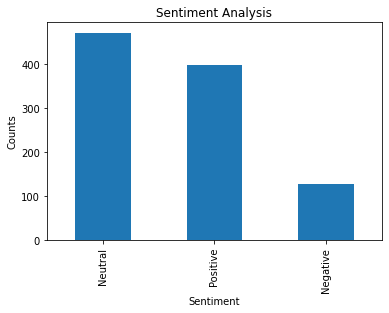

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
import pickle
model.save('RNNModel.h5')
w2v_model.save('W2VModel.w2v')
pickle.dump(tokenizer, open('tokenizer.pkl', "wb"), protocol = 0)
pickle.dump(encoder, open('encoder.pkl', "wb"), protocol=0)